<a href="https://colab.research.google.com/github/selvamani1992/DA_Analysis_on_charges/blob/main/Analysis_on_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the Order report data
order_report = pd.read_excel('/content/Company X - Order Report.xlsx')
order_report.head()

,ExternOrderNo,SKU,Order Qty,Payment Mode,Item Price(Per Qty.)
0,2001827036,8904223818706,1,COD,233
1,2001827036,8904223819093,1,COD,233
2,2001827036,8904223819109,1,COD,233
3,2001827036,8904223818430,1,COD,470
4,2001827036,8904223819277,1,COD,233


In [ ]:
order_report.ExternOrderNo.nunique()

124

In [ ]:
# read the sku data
sku_data = pd.read_excel('/content/Company X - SKU Master.xlsx')
sku_data.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [ ]:
# read the pincode data
pincode_data = pd.read_excel('/content/Company X - Pincode Zones.xlsx')
pincode_data.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [ ]:
pincode_data['Warehouse Pincode'].nunique()

1

In [ ]:
pincode_data['Customer Pincode'].nunique()

108

In [ ]:
# read invoice data
invoice_data = pd.read_excel('/content/Courier Company - Invoice.xlsx')
invoice_data.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,140.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,101.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [ ]:
# read the pincode data
rate_data = pd.read_excel('/content/Courier Company - Rates.xlsx')
rate_data.head()

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


In [ ]:
rate_data.Zone = rate_data.Zone.str.lower()
rate_data.head()

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,a,0.25,29.5,23.6,13.6,23.6
1,b,0.50,33.0,28.3,20.5,28.3
2,c,0.75,40.1,38.9,31.9,38.9
3,d,1.25,45.4,44.8,41.3,44.8
4,e,1.50,56.6,55.5,50.7,55.5


In [ ]:
order_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ExternOrderNo         400 non-null    int64 
 1   SKU                   400 non-null    object
 2   Order Qty             400 non-null    int64 
 3   Payment Mode          400 non-null    object
 4   Item Price(Per Qty.)  400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
#multiple items price with quantity in order report and add it as new column
order_report['Total Price'] = order_report['Item Price(Per Qty.)'] * order_report['Order Qty']

In [ ]:
order_report.head(10)

,ExternOrderNo,SKU,Order Qty,Payment Mode,Item Price(Per Qty.),Total Price
0,2001827036,8904223818706,1,COD,233,233
1,2001827036,8904223819093,1,COD,233,233
2,2001827036,8904223819109,1,COD,233,233
3,2001827036,8904223818430,1,COD,470,470
4,2001827036,8904223819277,1,COD,233,233
5,2001827036,GIFTBOX202002,1,COD,659,659
6,2001827036,8904223818638,2,COD,570,1140
7,2001827036,SACHETS001,1,COD,350,350
8,2001825261,8904223819024,4,Prepaid,3636,14544
9,2001825261,8904223819291,4,Prepaid,3907,15628


In [ ]:
#merge weight column from sku data with order report
order_report = pd.merge(order_report, sku_data, on='SKU', how='left')
order_report.head()

,ExternOrderNo,SKU,Order Qty,Payment Mode,Item Price(Per Qty.),Total Price,Weight (g)
0,2001827036,8904223818706,1,COD,233,233,127
1,2001827036,8904223819093,1,COD,233,233,150
2,2001827036,8904223819109,1,COD,233,233,100
3,2001827036,8904223818430,1,COD,470,470,165
4,2001827036,8904223819277,1,COD,233,233,350


In [ ]:
#multiple weight with quantity in order report and add it as new column
order_report['Total Weight'] = order_report['Weight (g)'] * order_report['Order Qty']

In [ ]:
order_report.head(10)

,ExternOrderNo,SKU,Order Qty,Payment Mode,Item Price(Per Qty.),Total Price,Weight (g),Total Weight
0,2001827036,8904223818706,1,COD,233,233,127,127
1,2001827036,8904223819093,1,COD,233,233,150,150
2,2001827036,8904223819109,1,COD,233,233,100,100
3,2001827036,8904223818430,1,COD,470,470,165,165
4,2001827036,8904223819277,1,COD,233,233,350,350
5,2001827036,GIFTBOX202002,1,COD,659,659,500,500
6,2001827036,GIFTBOX202002,1,COD,659,659,500,500
7,2001827036,8904223818638,2,COD,570,1140,137,274
8,2001827036,SACHETS001,1,COD,350,350,10,10
9,2001825261,8904223819024,4,Prepaid,3636,14544,112,448


In [ ]:
grouped_order_report = order_report.groupby(['ExternOrderNo', 'Payment Mode']).agg({
    'Order Qty': 'sum',
    'Total Price': 'sum',
    'Total Weight': 'sum'
})

In [ ]:
grouped_order_report.reset_index(inplace=True)

In [ ]:
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight
0,2001806210,COD,2,1324,220
1,2001806226,COD,2,2250,480
2,2001806229,COD,3,1082,500
3,2001806232,COD,8,10970,1302
4,2001806233,Prepaid,2,1486,245


In [ ]:
grouped_order_report.shape

(124, 5)

In [ ]:
grouped_order_report = pd.merge(grouped_order_report, invoice_data[['Order ID', 'Customer Pincode']], left_on='ExternOrderNo', right_on='Order ID', how='left')
grouped_order_report.drop('Order ID', axis=1, inplace=True)
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode
0,2001806210,COD,2,1324,220,140604
1,2001806226,COD,2,2250,480,723146
2,2001806229,COD,3,1082,500,421204
3,2001806232,COD,8,10970,1302,507101
4,2001806233,Prepaid,2,1486,245,263139


In [ ]:
grouped_order_report.shape

(124, 6)

In [ ]:
grouped_order_report = pd.merge(grouped_order_report, pincode_data[['Customer Pincode','Zone']], on='Customer Pincode', how='left')
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode,Zone
0,2001806210,COD,2,1324,220,140604,b
1,2001806226,COD,2,2250,480,723146,d
2,2001806229,COD,3,1082,500,421204,d
3,2001806232,COD,8,10970,1302,507101,d
4,2001806233,Prepaid,2,1486,245,263139,b


In [ ]:
grouped_order_report.shape

(174, 7)

In [ ]:
# converting Total Weight from grams to kg
grouped_order_report['Total Weight'] = grouped_order_report['Total Weight'] / 1000

In [ ]:
# rounding it by 2 decimal
grouped_order_report['Total Weight'] = grouped_order_report['Total Weight'].round(2)
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode,Zone
0,2001806210,COD,2,1324,0.22,140604,b
1,2001806226,COD,2,2250,0.48,723146,d
2,2001806229,COD,3,1082,0.50,421204,d
3,2001806232,COD,8,10970,1.30,507101,d
4,2001806233,Prepaid,2,1486,0.24,263139,b


In [ ]:
 #Adding weight slabs from rate data to grouped order report
grouped_order_report = pd.merge(grouped_order_report, rate_data[['Zone', 'Weight Slabs']], on='Zone', how='left')
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode,Zone,Weight Slabs
0,2001806210,COD,2,1324,0.22,140604,b,0.50
1,2001806226,COD,2,2250,0.48,723146,d,1.25
2,2001806229,COD,3,1082,0.50,421204,d,1.25
3,2001806232,COD,8,10970,1.30,507101,d,1.25
4,2001806233,Prepaid,2,1486,0.24,263139,b,0.50


In [ ]:
# Adjust the total weight to the nearest multiple of the weight slab
grouped_order_report.apply(lambda row: math.ceil(row['Total Weight'] / row['Weight Slabs']) * row['Weight Slabs'], axis=1)

0      0.50
1      1.25
2      1.25
3      2.50
4      0.50
       ... 
169    0.50
170    1.50
171    1.25
172    2.50
173    3.00
Length: 174, dtype: float64

In [ ]:
grouped_order_report.shape

(174, 8)

In [ ]:
grouped_order_report.duplicated().sum()

50

In [ ]:
#remove duplicates
grouped_order_report.drop_duplicates(inplace=True)
grouped_order_report.shape

(124, 8)

In [ ]:
grouped_order_report['Weight slab as per X (KG)'] = grouped_order_report.apply(
    lambda row: math.ceil(row['Total Weight'] / row['Weight Slabs']) * row['Weight Slabs'], axis=1)

In [ ]:
grouped_order_report.head()

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode,Zone,Weight Slabs,Weight slab as per X (KG)
0,2001806210,COD,2,1324,0.22,140604,b,0.50,0.50
1,2001806226,COD,2,2250,0.48,723146,d,1.25,1.25
2,2001806229,COD,3,1082,0.50,421204,d,1.25,1.25
3,2001806232,COD,8,10970,1.30,507101,d,1.25,2.50
4,2001806233,Prepaid,2,1486,0.24,263139,b,0.50,0.50


In [ ]:
grouped_order_report = pd.merge(grouped_order_report, invoice_data[
    ['Order ID', 'AWB Code','Charged Weight','Zone','Type of Shipment','Billing Amount (Rs.)']
    ], left_on='ExternOrderNo', right_on='Order ID',how='left')
grouped_order_report.drop('Order ID', axis=1, inplace=True)
grouped_order_report

,ExternOrderNo,Payment Mode,Order Qty,Total Price,Total Weight,Customer Pincode,Zone_x,Weight Slabs,Weight slab as per X (KG),AWB Code,Charged Weight,Zone_y,Type of Shipment,Billing Amount (Rs.)
0,2001806210,COD,2,1324,0.22,140604,b,0.50,0.50,1091117221940,2.92,b,Forward charges,174.5
1,2001806226,COD,2,2250,0.48,723146,d,1.25,1.25,1091117222065,0.68,d,Forward charges,90.2
2,2001806229,COD,3,1082,0.50,421204,d,1.25,1.25,1091117222080,0.71,d,Forward charges,90.2
3,2001806232,COD,8,10970,1.30,507101,d,1.25,2.50,1091117222124,1.30,d,Forward charges,140.0
4,2001806233,Prepaid,2,1486,0.24,263139,b,0.50,0.50,1091117222135,0.78,b,Forward charges,61.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,Prepaid,2,484,0.48,342008,b,0.50,0.50,1091121183730,0.50,d,Forward charges,45.4
120,2001822466,COD,10,64922,1.38,342301,b,0.50,1.50,1091121305541,1.10,d,Forward charges,135.0
121,2001823564,Prepaid,6,9606,0.67,492001,d,1.25,1.25,1091121666133,0.70,d,Forward and RTO charges,172.8
122,2001825261,Prepaid,13,33388,1.56,517128,d,1.25,2.50,1091121981575,1.60,d,Forward and RTO charges,345.0


In [ ]:
grouped_order_report['Weight slab charged by Courier Company (KG)'] = grouped_order_report.apply(
    lambda row: math.ceil(row['Charged Weight'] / row['Weight Slabs']) * row['Weight Slabs'], axis=1)

In [ ]:
grouped_order_report = grouped_order_report[
    ['ExternOrderNo','AWB Code','Order Qty','Type of Shipment','Payment Mode','Total Price',
     'Total Weight','Weight slab as per X (KG)','Charged Weight',
     'Weight slab charged by Courier Company (KG)','Billing Amount (Rs.)','Zone_x','Zone_y']]
grouped_order_report

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y
0,2001806210,1091117221940,2,Forward charges,COD,1324,0.22,0.50,2.92,3.00,174.5,b,b
1,2001806226,1091117222065,2,Forward charges,COD,2250,0.48,1.25,0.68,1.25,90.2,d,d
2,2001806229,1091117222080,3,Forward charges,COD,1082,0.50,1.25,0.71,1.25,90.2,d,d
3,2001806232,1091117222124,8,Forward charges,COD,10970,1.30,2.50,1.30,2.50,140.0,d,d
4,2001806233,1091117222135,2,Forward charges,Prepaid,1486,0.24,0.50,0.78,1.00,61.3,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,2,Forward charges,Prepaid,484,0.48,0.50,0.50,0.50,45.4,b,d
120,2001822466,1091121305541,10,Forward charges,COD,64922,1.38,1.50,1.10,1.50,135.0,b,d
121,2001823564,1091121666133,6,Forward and RTO charges,Prepaid,9606,0.67,1.25,0.70,1.25,172.8,d,d
122,2001825261,1091121981575,13,Forward and RTO charges,Prepaid,33388,1.56,2.50,1.60,2.50,345.0,d,d


In [ ]:
rate_data

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,a,0.25,29.5,23.6,13.6,23.6
1,b,0.50,33.0,28.3,20.5,28.3
2,c,0.75,40.1,38.9,31.9,38.9
3,d,1.25,45.4,44.8,41.3,44.8
4,e,1.50,56.6,55.5,50.7,55.5


In [ ]:
def charge_calc(row):
    zone = row['Zone_x']
    weight = row['Weight slab as per X (KG)']
    weight_slab_test = rate_data[rate_data['Zone']==zone]['Weight Slabs']
    weight_slab_test = weight_slab_test.iloc[0]
    times = weight/weight_slab_test
    first_forward_cost = rate_data[rate_data['Zone']==zone]['Forward Fixed Charge']
    first_forward_cost = first_forward_cost.iloc[0]
    next_forward_cost = rate_data[rate_data['Zone']==zone]['Forward Additional Weight Slab Charge']
    next_forward_cost = next_forward_cost.iloc[0]
    first_rto_cost = rate_data[rate_data['Zone']==zone]['RTO Fixed Charge']
    first_rto_cost = first_rto_cost.iloc[0]
    next_rto_cost = rate_data[rate_data['Zone']==zone]['RTO Additional Weight Slab Charge']
    next_rto_cost = next_rto_cost.iloc[0]
    COD_charge = 0
    if row['Payment Mode'] == 'Prepaid':
      COD_charge = 0
    elif row['Payment Mode'] == 'COD':
      if row['Total Price'] > 300:
        COD_charge = round(row['Total Price']*0.05,2)
      else:
        COD_charge = 15
    if row['Type of Shipment'] == 'Forward and RTO charges':
      result = round((first_forward_cost + ((times-1) * next_forward_cost) + first_rto_cost + ((times-1) * next_rto_cost) + COD_charge),2)
    elif row['Type of Shipment'] == 'Forward charges':
      result = round((first_forward_cost + ((times-1) * next_forward_cost) + COD_charge),2)
    return result

In [ ]:
grouped_order_report['Expected Charge as per X (Rs.)'] = grouped_order_report.apply(charge_calc, axis=1)

In [ ]:
grouped_order_report

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
0,2001806210,1091117221940,2,Forward charges,COD,1324,0.22,0.50,2.92,3.00,174.5,b,b,99.2
1,2001806226,1091117222065,2,Forward charges,COD,2250,0.48,1.25,0.68,1.25,90.2,d,d,157.9
2,2001806229,1091117222080,3,Forward charges,COD,1082,0.50,1.25,0.71,1.25,90.2,d,d,99.5
3,2001806232,1091117222124,8,Forward charges,COD,10970,1.30,2.50,1.30,2.50,140.0,d,d,638.7
4,2001806233,1091117222135,2,Forward charges,Prepaid,1486,0.24,0.50,0.78,1.00,61.3,b,b,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,2,Forward charges,Prepaid,484,0.48,0.50,0.50,0.50,45.4,b,d,33.0
120,2001822466,1091121305541,10,Forward charges,COD,64922,1.38,1.50,1.10,1.50,135.0,b,d,3335.7
121,2001823564,1091121666133,6,Forward and RTO charges,Prepaid,9606,0.67,1.25,0.70,1.25,172.8,d,d,86.7
122,2001825261,1091121981575,13,Forward and RTO charges,Prepaid,33388,1.56,2.50,1.60,2.50,345.0,d,d,176.3


In [ ]:
grouped_order_report[grouped_order_report['Expected Charge as per X (Rs.)']==grouped_order_report['Billing Amount (Rs.)']]

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
11,2001806458,1091117223244,2,Forward charges,Prepaid,1491,0.70,1.00,1.00,1.00,61.3,b,b,61.3
31,2001807012,1091117229345,1,Forward charges,Prepaid,603,0.24,1.25,0.15,1.25,45.4,d,d,45.4
33,2001807058,1091117323112,6,Forward charges,Prepaid,2669,1.17,1.50,1.15,1.50,89.6,b,b,89.6
35,2001807186,1091117323812,3,Forward charges,Prepaid,1082,0.50,1.25,0.50,1.25,45.4,d,d,45.4
37,2001807290,1091117324206,3,Forward charges,Prepaid,1082,0.50,1.25,0.50,1.25,45.4,d,d,45.4
44,2001807814,1091117326612,3,Forward charges,Prepaid,1399,0.61,1.00,0.79,1.00,61.3,b,b,61.3
46,2001807930,1091117327695,1,Forward charges,Prepaid,603,0.24,1.25,0.15,1.25,45.4,d,d,45.4
48,2001807956,1091117327275,5,Forward charges,Prepaid,1970,1.08,1.50,1.08,1.50,89.6,b,b,89.6
54,2001808118,1091117435134,3,Forward charges,Prepaid,2302,0.34,0.50,0.50,0.50,33.0,b,b,33.0
59,2001808507,1091117436383,3,Forward charges,Prepaid,1399,0.61,1.00,0.79,1.00,61.3,b,b,61.3


In [ ]:
grouped_order_report[grouped_order_report['Expected Charge as per X (Rs.)']>grouped_order_report['Billing Amount (Rs.)']]

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
1,2001806226,1091117222065,2,Forward charges,COD,2250,0.48,1.25,0.68,1.25,90.2,d,d,157.90
2,2001806229,1091117222080,3,Forward charges,COD,1082,0.50,1.25,0.71,1.25,90.2,d,d,99.50
3,2001806232,1091117222124,8,Forward charges,COD,10970,1.30,2.50,1.30,2.50,140.0,d,d,638.70
6,2001806273,1091117222194,4,Forward charges,COD,1684,0.62,1.25,1.00,1.25,101.2,d,d,129.60
12,2001806471,1091117223351,10,Forward charges,COD,6405,1.62,2.00,1.70,2.00,179.8,b,d,438.15
15,2001806567,1091117224902,6,Forward charges,COD,3996,0.95,1.25,1.16,1.25,141.0,d,d,245.20
16,2001806575,1091117225016,3,Forward charges,COD,1082,0.50,0.50,0.68,1.00,71.3,b,b,87.10
17,2001806616,1091117225484,6,Forward charges,COD,3079,0.96,1.00,1.08,1.50,98.6,b,b,215.25
18,2001806652,1091117226221,3,Forward charges,COD,1082,0.50,1.25,0.69,1.25,90.2,d,d,99.50
19,2001806686,1091117229555,1,Forward charges,COD,603,0.24,1.25,0.15,1.25,45.4,d,d,75.55


In [ ]:
grouped_order_report[grouped_order_report['Expected Charge as per X (Rs.)']<grouped_order_report['Billing Amount (Rs.)']]

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
0,2001806210,1091117221940,2,Forward charges,COD,1324,0.22,0.50,2.92,3.00,174.5,b,b,99.2
4,2001806233,1091117222135,2,Forward charges,Prepaid,1486,0.24,0.50,0.78,1.00,61.3,b,b,33.0
5,2001806251,1091117222146,2,Forward charges,Prepaid,1486,0.24,1.25,1.27,2.50,135.0,d,d,45.4
7,2001806304,1091117222360,3,Forward charges,Prepaid,1082,0.50,0.50,0.71,1.00,90.2,b,d,33.0
8,2001806338,1091117222570,3,Forward charges,Prepaid,1082,0.50,1.25,0.70,1.25,90.2,d,d,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2001821742,1091121034114,1,Forward charges,Prepaid,603,0.24,0.50,0.15,0.50,45.4,b,d,33.0
117,2001821750,1091121034350,3,Forward charges,Prepaid,1284,0.76,1.00,0.80,1.00,90.2,b,d,61.3
119,2001821995,1091121183730,2,Forward charges,Prepaid,484,0.48,0.50,0.50,0.50,45.4,b,d,33.0
121,2001823564,1091121666133,6,Forward and RTO charges,Prepaid,9606,0.67,1.25,0.70,1.25,172.8,d,d,86.7


In [ ]:
final_report = grouped_order_report[['ExternOrderNo','AWB Code',	'Total Weight', 'Weight slab as per X (KG)',	'Charged Weight','Weight slab charged by Courier Company (KG)',	'Zone_x',	'Zone_y',	'Expected Charge as per X (Rs.)','Billing Amount (Rs.)']]

In [ ]:
final_report['Difference Between Expected Charges and Billed Charges (Rs.)'] = final_report['Expected Charge as per X (Rs.)'] - final_report['Billing Amount (Rs.)']

In [ ]:
final_report

,ExternOrderNo,AWB Code,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Zone_x,Zone_y,Expected Charge as per X (Rs.),Billing Amount (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,1091117221940,0.22,0.50,2.92,3.00,b,b,99.2,174.5,-75.3
1,2001806226,1091117222065,0.48,1.25,0.68,1.25,d,d,157.9,90.2,67.7
2,2001806229,1091117222080,0.50,1.25,0.71,1.25,d,d,99.5,90.2,9.3
3,2001806232,1091117222124,1.30,2.50,1.30,2.50,d,d,638.7,140.0,498.7
4,2001806233,1091117222135,0.24,0.50,0.78,1.00,b,b,33.0,61.3,-28.3
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.48,0.50,0.50,0.50,b,d,33.0,45.4,-12.4
120,2001822466,1091121305541,1.38,1.50,1.10,1.50,b,d,3335.7,135.0,3200.7
121,2001823564,1091121666133,0.67,1.25,0.70,1.25,d,d,86.7,172.8,-86.1
122,2001825261,1091121981575,1.56,2.50,1.60,2.50,d,d,176.3,345.0,-168.7


In [ ]:
final_report.rename(columns={'ExternOrderNo': 'Order ID',
                             'AWB Code':'AWB Number',
                             'Total Weight':'Total weight as per X (KG)',
                             'Charged Weight':'Total weight as per Courier Company (KG)',
                             'Zone_x':'Delivery Zone as per X',
                             'Zone_y':'Delivery Zone charged by Courier Company',
                             'Billing Amount (Rs.)':'Charges Billed by Courier Company (Rs.)'}, inplace=True)
final_report

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,1091117221940,0.22,0.50,2.92,3.00,b,b,99.2,174.5,-75.3
1,2001806226,1091117222065,0.48,1.25,0.68,1.25,d,d,157.9,90.2,67.7
2,2001806229,1091117222080,0.50,1.25,0.71,1.25,d,d,99.5,90.2,9.3
3,2001806232,1091117222124,1.30,2.50,1.30,2.50,d,d,638.7,140.0,498.7
4,2001806233,1091117222135,0.24,0.50,0.78,1.00,b,b,33.0,61.3,-28.3
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.48,0.50,0.50,0.50,b,d,33.0,45.4,-12.4
120,2001822466,1091121305541,1.38,1.50,1.10,1.50,b,d,3335.7,135.0,3200.7
121,2001823564,1091121666133,0.67,1.25,0.70,1.25,d,d,86.7,172.8,-86.1
122,2001825261,1091121981575,1.56,2.50,1.60,2.50,d,d,176.3,345.0,-168.7


In [ ]:
excel_file_path = 'Resultant Report.xlsx'
final_report.to_excel(excel_file_path, index=False)

In [ ]:
correctly_charged = final_report[final_report['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0]
overcharged = final_report[final_report['Difference Between Expected Charges and Billed Charges (Rs.)'] < 0]
undercharged = final_report[final_report['Difference Between Expected Charges and Billed Charges (Rs.)'] > 0]

data = {
    'Total orders where X has been correctly charged': [correctly_charged.shape[0], correctly_charged['Charges Billed by Courier Company (Rs.)'].sum()],
    'Total Orders where X has been overcharged': [overcharged.shape[0], abs(overcharged['Difference Between Expected Charges and Billed Charges (Rs.)'].sum())],
    'Total Orders where X has been undercharged': [undercharged.shape[0], abs(undercharged['Difference Between Expected Charges and Billed Charges (Rs.)'].sum())]
}

summary_report = pd.DataFrame.from_dict(data, orient='index', columns=['Count', 'Amount (Rs.)'])
summary_report

,Count,Amount (Rs.)
Total orders where X has been correctly charged,11,667.30
Total Orders where X has been overcharged,68,4154.45
Total Orders where X has been undercharged,45,10821.20


In [ ]:
excel_file_path = 'Summary Report.xlsx'
summary_report.to_excel(excel_file_path, index=True)

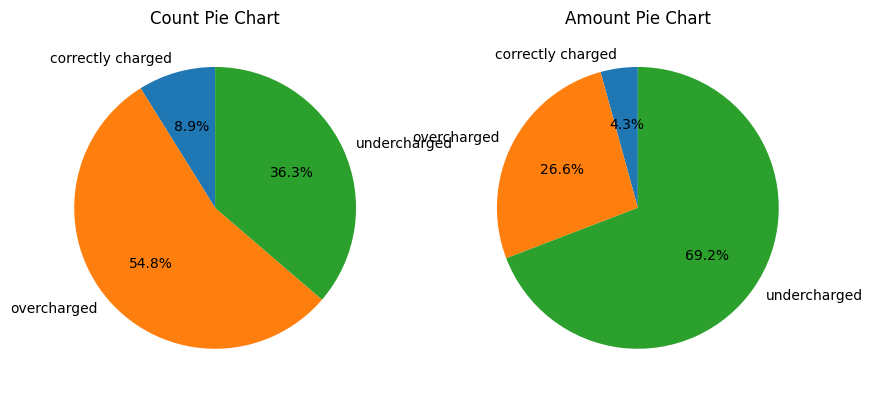

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].pie(summary_report['Count'], labels=['correctly charged', 'overcharged', 'undercharged'], autopct='%1.1f%%', startangle=90)
axs[0].set_title("Count Pie Chart")

axs[1].pie(summary_report['Amount (Rs.)'], labels=['correctly charged', 'overcharged', 'undercharged'], autopct='%1.1f%%', startangle=90)
axs[1].set_title("Amount Pie Chart")
plt.show()

In [ ]:
overcharged_wrong_zone = overcharged[overcharged['Delivery Zone as per X']!=overcharged['Delivery Zone charged by Courier Company']]

In [ ]:
overcharged_wrong_zone.shape

(41, 11)

In [ ]:
overcharged_wrong_zone

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
7,2001806304,1091117222360,0.50,0.5,0.71,1.0,b,d,33.00,90.2,-57.20
26,2001806823,1091117228133,0.13,0.5,0.59,1.0,b,d,48.00,97.2,-49.20
27,2001806828,1091117228192,0.50,0.5,0.69,1.0,b,d,87.10,100.2,-13.10
29,2001806968,1091117229183,0.50,0.5,0.68,1.0,b,d,33.00,90.2,-57.20
36,2001807241,1091117324011,0.61,1.0,0.79,1.0,b,d,61.30,90.2,-28.90
38,2001807328,1091117324346,0.49,0.5,2.28,2.5,b,d,48.00,235.6,-187.60
39,2001807329,1091117333100,0.50,0.5,0.73,1.0,b,d,33.00,90.2,-57.20
42,2001807613,1091117333251,0.83,1.0,1.04,1.5,b,d,114.75,135.0,-20.25
43,2001807785,1091117326424,0.50,0.5,0.68,1.0,b,d,33.00,90.2,-57.20
45,2001807852,1091117326925,0.50,0.5,0.74,1.0,b,d,33.00,90.2,-57.20


In [ ]:
grouped_order_report[grouped_order_report['Expected Charge as per X (Rs.)']>grouped_order_report['Billing Amount (Rs.)']]

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
1,2001806226,1091117222065,2,Forward charges,COD,2250,0.48,1.25,0.68,1.25,90.2,d,d,157.90
2,2001806229,1091117222080,3,Forward charges,COD,1082,0.50,1.25,0.71,1.25,90.2,d,d,99.50
3,2001806232,1091117222124,8,Forward charges,COD,10970,1.30,2.50,1.30,2.50,140.0,d,d,638.70
6,2001806273,1091117222194,4,Forward charges,COD,1684,0.62,1.25,1.00,1.25,101.2,d,d,129.60
12,2001806471,1091117223351,10,Forward charges,COD,6405,1.62,2.00,1.70,2.00,179.8,b,d,438.15
15,2001806567,1091117224902,6,Forward charges,COD,3996,0.95,1.25,1.16,1.25,141.0,d,d,245.20
16,2001806575,1091117225016,3,Forward charges,COD,1082,0.50,0.50,0.68,1.00,71.3,b,b,87.10
17,2001806616,1091117225484,6,Forward charges,COD,3079,0.96,1.00,1.08,1.50,98.6,b,b,215.25
18,2001806652,1091117226221,3,Forward charges,COD,1082,0.50,1.25,0.69,1.25,90.2,d,d,99.50
19,2001806686,1091117229555,1,Forward charges,COD,603,0.24,1.25,0.15,1.25,45.4,d,d,75.55


In [ ]:
grouped_order_report[grouped_order_report['Expected Charge as per X (Rs.)']>grouped_order_report['Billing Amount (Rs.)']]['Total Price'].sum()

268044

In [ ]:
grouped_order_report[(grouped_order_report['Expected Charge as per X (Rs.)']>grouped_order_report['Billing Amount (Rs.)'])&(grouped_order_report['Total Price']>10000)]

,ExternOrderNo,AWB Code,Order Qty,Type of Shipment,Payment Mode,Total Price,Total Weight,Weight slab as per X (KG),Charged Weight,Weight slab charged by Courier Company (KG),Billing Amount (Rs.),Zone_x,Zone_y,Expected Charge as per X (Rs.)
3,2001806232,1091117222124,8,Forward charges,COD,10970,1.30,2.5,1.30,2.5,140.0,d,d,638.70
32,2001807036,1091117323005,13,Forward charges,COD,39018,1.46,2.5,1.64,2.5,179.8,d,d,2041.10
41,2001807415,1091117325094,7,Forward charges,Prepaid,16989,1.05,1.5,1.00,1.0,61.3,b,b,89.60
97,2001812854,1091118548333,11,Forward charges,COD,12282,2.57,3.0,2.94,3.0,280.4,b,d,788.60
105,2001817093,1091121485824,11,Forward and RTO charges,COD,12605,1.36,1.5,1.30,1.5,166.1,b,b,796.95
120,2001822466,1091121305541,10,Forward charges,COD,64922,1.38,1.5,1.10,1.5,135.0,b,d,3335.70


In [ ]:
grouped_order_report[(grouped_order_report['Expected Charge as per X (Rs.)']>grouped_order_report['Billing Amount (Rs.)'])&(grouped_order_report['Total Price']>10000)]['Total Price'].sum()

156786

# Insights on the occurrence:

**Correctly charged category** is very less compare to other two categories

*   9% on total orders
*   4% on total value

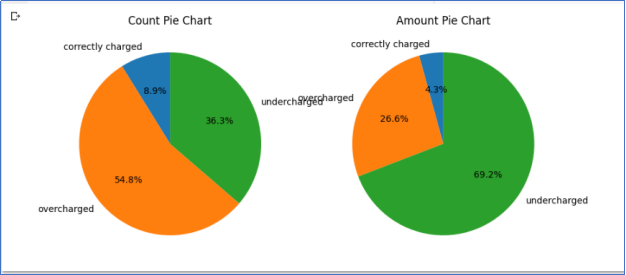

In the aspect of amount, company X is in profitable zone, Undercharged amounts are very high compare to overcharged amounts but In the aspect of order count, 55% of the orders are charged over the committed cost.

**Incorrect zone on Overcharge:**
*  One of the main reasons for overcharging is the incorrect zone assignment.
Out of the 68 overall overcharged orders, 41 of them were charged with the wrong zone. 	It is important to note that all 41 orders actually belong to Zone B, but the courier company mistakenly mentioned Zone D.
*  For Zone B, the minimum weight slab is 500g, and the rate is Rs. 33 per kg for forward shipments. In contrast, for Zone D, the minimum weight slab is 1.25kg, and the rate is Rs. 45.4 for forward shipments.
*  There are a few incorrect zones in the undercharged category, but looks like those have been compensated with other benefits.


**COD charges on Undercharges:**
*  Most of the orders in the undercharged categories belong to COD payment, and it seems that the percentage calculation of COD charges is different for high-value products.
*  The top 5 orders in the undercharged category are characterized by high values, less weight, and cash on delivery (COD). However, the courier charges for these orders are almost the same as those for normal orders.

# Suggestion to X company for consideration:

*  For the utmost accuracy in zone selection, it would be highly beneficial to communicate with the courier company and emphasize the importance of performing a double check. This step will ensure that any errors or inaccuracies are minimized, leading to smoother deliveries and happier customers. Additionally, consider suggesting an update to their system that automatically fills in the correct zone information. This would not only save time but also provide a reliable solution for consistent and error-free order processing.
*  In the event that the courier company makes any changes to the zone list, kindly obtain the revised version and ensure that our organization's system is promptly updated.
*  Please make sure to collect the updated list of COD charges and keep it handy for future reference. This will help you accurately calculate any additional costs associated with cash on delivery transactions.
*  Efficiently managing courier charges is crucial for any business. By closely monitoring these expenses and consistently communicating with the vendor, you can work towards minimizing them to a great extent. Whether the charges are under or over what is expected, it's important to address and resolve them promptly in order to achieve cost savings.


